In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
opti_df = pd.read_hdf('../experiments/anytown_tst_db.h5', 'results')
#hist_files = [f for f in glob.glob('../experiments/history/anytownRRR*')]
hist_files = ['../experiments/history/anytownRRR1.h5',
              '../experiments/history/anytownRRR2.h5',
              '../experiments/history/anytownRRR10.h5',
              '../experiments/history/anytownRRR11.h5',
              '../experiments/history/anytownRRR12.h5',
              '../experiments/history/anytownRRR13.h5']
hist_files = ['../experiments/history/anytownRRR5.h5',
              '../experiments/history/anytownRRR6.h5',
              '../experiments/history/anytownRRR7.h5',
              '../experiments/history/anytownRRR8.h5']
subdfs = dict()
for file in hist_files:
    subdfs[file[23:-3]] = pd.read_hdf(file)
dqn_df = pd.concat(subdfs.values(), axis=1, keys=subdfs.keys())
idx = pd.IndexSlice

In [3]:
print(opti_df['nm']['reward'].mean())
print(opti_df['de']['reward'].mean())
print(opti_df['pso']['reward'].mean())

0.9350761403591599
0.9356803580592212
0.935495037599382


In [4]:
opti_algo = 'de'
dqn_df.head(3)

anytownRRR5                                                   \
                  lastReward bestReward worstReward nFail nBump nSiesta nStep   
step_id scene_id                                                                
1000    0           0.907982   0.907982    0.907982   0.0   0.0     3.0   3.0   
        1           0.830363   0.830363    0.830363   0.0   0.0     3.0   3.0   
        2           0.927275   0.927275    0.927275   0.0   0.0     3.0   3.0   

                                               anytownRRR6  ... anytownRRR7  \
                 explorationFactor speedOfGrp0  lastReward  ... speedOfGrp0   
step_id scene_id                                            ...               
1000    0                 0.978947        1.05    0.896342  ...        1.10   
        1                 0.978947        1.20    0.887584  ...        0.95   
        2                 0.978947        1.10    0.867196  ...        1.05   

                 anytownRRR8                                                   \
                  lastReward bestReward worstReward nFail nBump nSiesta nStep   
step_id scene_id                                                                
1000    0           0.907982   0.907982    0.907982   0.0   0.0     3.0   3.0   
        1           0.867342   0.867342    0.813257   0.0   0.0     3.0   4.0   
        2           0.896489   0.896489    0.896489   0.0   0.0     3.0   3.0   

                                                
                 explorationFactor speedOfGrp0  
step_id scene_id                                
1000    0                 0.978947        1.05  
        1                 0.978947        0.95  
        2                 0.978947        1.00  

[3 rows x 36 columns]

### utolsó jutalom / legnagyobb jutalom

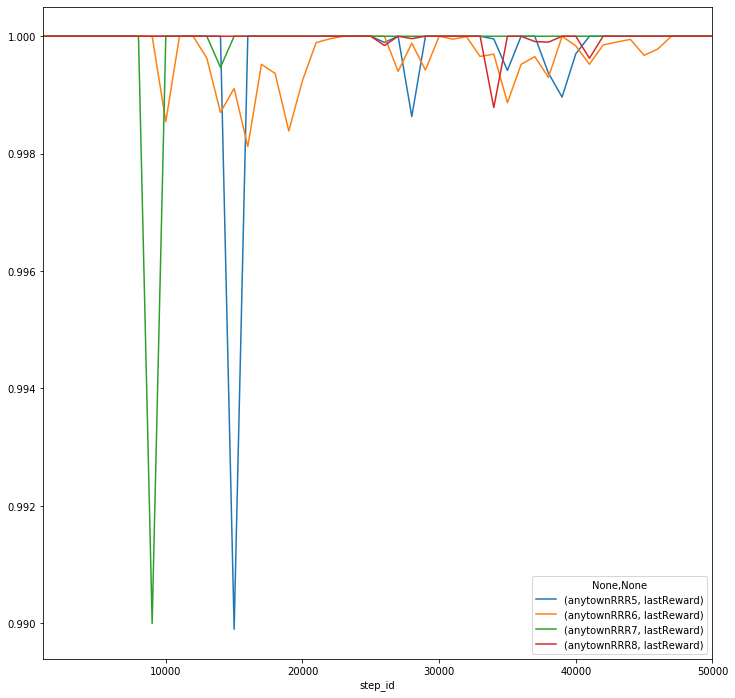

In [5]:
ratio = dqn_df.loc[idx[:,:], idx[:,'lastReward']] / dqn_df.loc[idx[:,:], idx[:,'bestReward']].values
mean_ratio = ratio.astype(float).groupby(level=0).mean()
mean_ratio.plot(figsize=(12,12))

### utolsó jutalom / opti jutalom

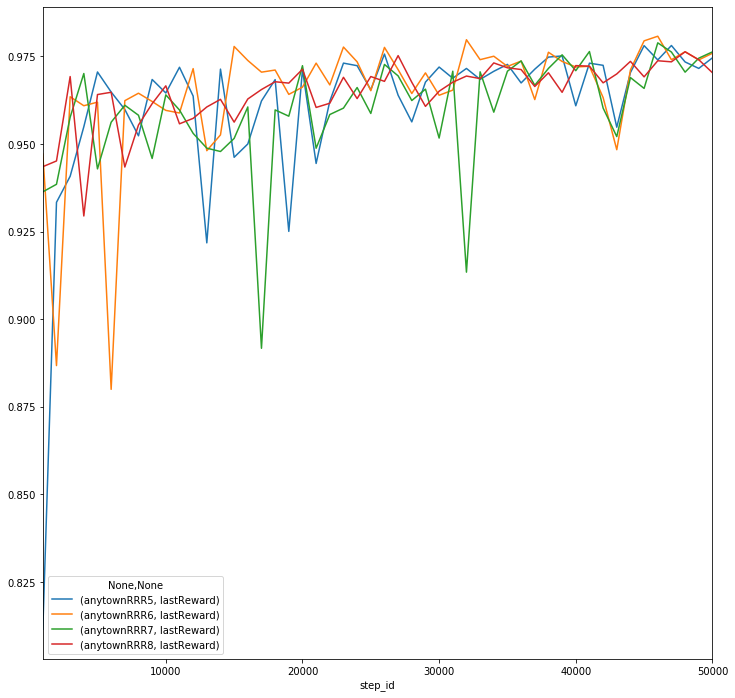

In [6]:
agent_rewards = dqn_df.loc[idx[:,:], idx[:,'lastReward']]
opti_rewards = opti_df[opti_algo]['reward']
length_multiplier = agent_rewards.index.get_level_values(0).nunique()
opti_rewards_ss = pd.Series(np.tile(opti_rewards.values, length_multiplier), index=agent_rewards.index)
mean_ratio = agent_rewards.div(opti_rewards_ss, axis=0).groupby(level=0).mean()
mean_ratio.plot(figsize=(12,12))

### közelítőleg jó beállítások aránya

In [7]:
agent_speeds = dqn_df.filter(regex="speedOfGrp*")
new_keys = agent_speeds.keys().levels[0]
length_multiplier = agent_speeds.index.get_level_values(0).nunique()
opti_speeds = opti_df[opti_algo].filter(regex='speedOfGrp*')
opti_speeds = pd.concat([opti_speeds]*length_multiplier, axis=0, keys=agent_speeds.index.levels[0])
opti_speeds = pd.concat([opti_speeds]*len(new_keys), axis=1, keys=new_keys)

close_enough = ((agent_speeds - opti_speeds).abs()<0.05).astype(float)

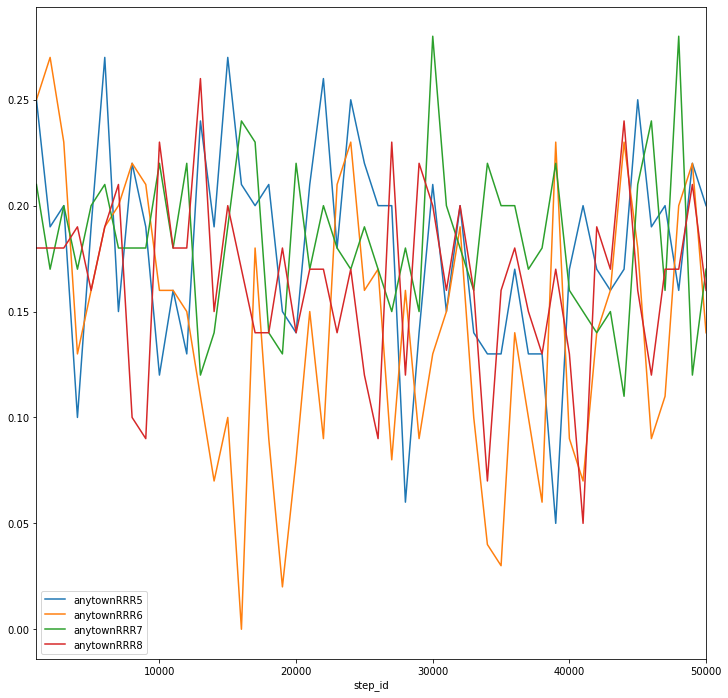

In [8]:
close_enough.groupby(axis=0, level=0).mean().groupby(axis=1, level=0).mean().plot(figsize=(12,12))

### hibás beállítások aránya

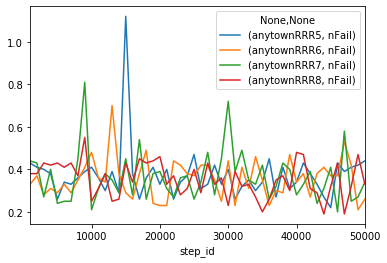

In [9]:
failures = dqn_df.loc[idx[:,:], idx[:,'nFail']]
failures.groupby(level=0).mean().plot()

### kitörési próbálkozások aránya

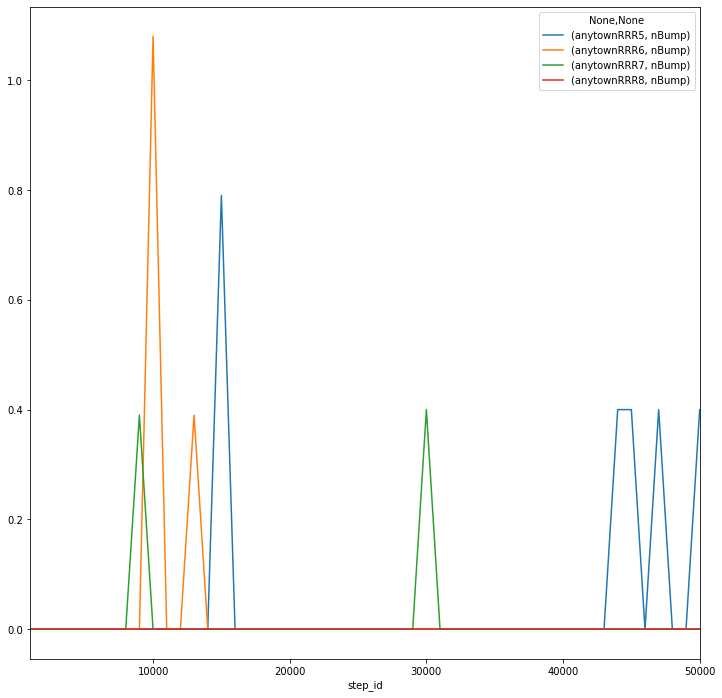

In [10]:
bumps = dqn_df.loc[idx[:,:], idx[:,'nBump']]
bumps.groupby(level=0).mean().plot(figsize=(12,12))

### szieszták aránya

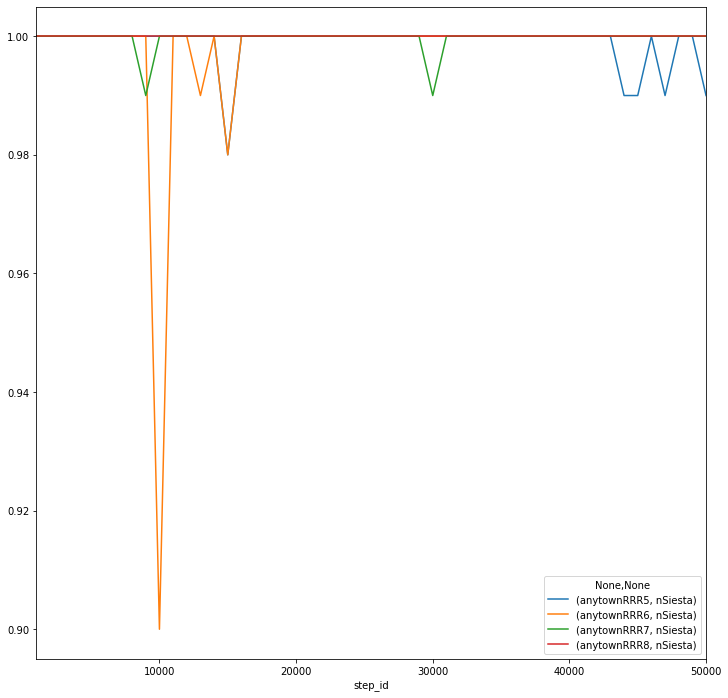

In [11]:
siestas = (dqn_df.loc[idx[:,:], idx[:,'nSiesta']] == 3).astype(float)
siestas.groupby(level=0).mean().plot(figsize=(12,12))

### lépések száma epizódonként

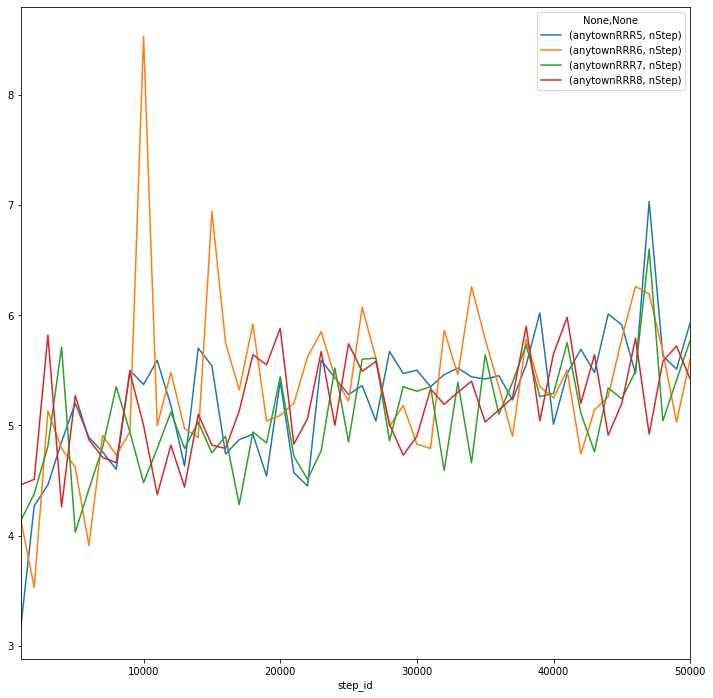

In [12]:
steps = dqn_df.loc[idx[:,:], idx[:,'nStep']]
steps.groupby(level=0).mean().plot(figsize=(12,12))

In [13]:
steps.groupby(level=0).mean()

,anytownRRR5,anytownRRR6,anytownRRR7,anytownRRR8
,nStep,nStep,nStep,nStep
step_id,,,,
1000,3.15,4.15,4.13,4.46
2000,4.27,3.53,4.38,4.51
3000,4.46,5.13,4.81,5.82
4000,4.85,4.79,5.71,4.26
5000,5.20,4.62,4.03,5.27
6000,4.89,3.91,4.42,4.87
7000,4.76,4.91,4.80,4.71
8000,4.60,4.73,5.35,4.66
